In [5]:
# Imports
import gzip
import json
import pandas as pd

In [6]:
file_path = '/home/grohotolskim/ds420/nq-train-01.jsonl.gz'

In [7]:
file = None

with gzip.open(file_path, "rb") as f:
    file = list(f)

In [8]:
json_data = []
for line in file:
    json_data.append(json.loads(line))

#df = pd.DataFrame.from_dict(js, orient="index")


In [9]:
df = pd.DataFrame(json_data)

In [10]:
df.head()

,annotations,document_html,document_title,document_tokens,document_url,example_id,long_answer_candidates,question_text,question_tokens
0,"[{'annotation_id': 4409923363157391670, 'long_...","<!DOCTYPE html>\n<HTML class=""client-js ve-not...",United States twenty-dollar bill,"[{'end_byte': 98, 'html_token': False, 'start_...",https://en.wikipedia.org//w/index.php?title=Un...,-1343909637711382355,"[{'end_byte': 53308, 'end_token': 151, 'start_...",who appeared in the $20 bill in 1875,"[who, appeared, in, the, $, 20, bill, in, 1875]"
1,"[{'annotation_id': 13564526573536974043, 'long...","<!DOCTYPE html>\n<HTML class=""client-js ve-not...",All-India Muslim League,"[{'end_byte': 95, 'html_token': False, 'start_...",https://en.wikipedia.org//w/index.php?title=Al...,3478816195086130677,"[{'end_byte': 64459, 'end_token': 256, 'start_...",who presided over the first session of muslim ...,"[who, presided, over, the, first, session, of,..."
2,"[{'annotation_id': 3065806184986558256, 'long_...","<!DOCTYPE html>\n<HTML class=""client-js ve-not...",I Need Love,"[{'end_byte': 93, 'html_token': False, 'start_...",https://en.wikipedia.org//w/index.php?title=I_...,6795441020928748336,"[{'end_byte': 55680, 'end_token': 87, 'start_b...",ll cool j in the back of my mind,"[ll, cool, j, in, the, back, of, my, mind]"
3,"[{'annotation_id': 3444221374492880831, 'long_...","<!DOCTYPE html>\n<HTML class=""client-js ve-not...",Gospel of Matthew,"[{'end_byte': 98, 'html_token': False, 'start_...",https://en.wikipedia.org//w/index.php?title=Go...,-8058337089547484256,"[{'end_byte': 58072, 'end_token': 148, 'start_...",who is generally accepted to be the author of ...,"[who, is, generally, accepted, to, be, the, au..."
4,"[{'annotation_id': 333596884623623025, 'long_a...","<!DOCTYPE html>\n<HTML class=""client-js ve-not...",Fuller House (TV series),"[{'end_byte': 98, 'html_token': False, 'start_...",https://en.wikipedia.org//w/index.php?title=Fu...,2896905706211356770,"[{'end_byte': 49598, 'end_token': 458, 'start_...",why are there only nine episodes of fuller hou...,"[why, are, there, only, nine, episodes, of, fu..."


In [11]:
token_1 = df.iloc[1]

In [12]:
print(token_1)

annotations               [{'annotation_id': 13564526573536974043, 'long...
document_html             <!DOCTYPE html>\n<HTML class="client-js ve-not...
document_title                                      All-India Muslim League
document_tokens           [{'end_byte': 95, 'html_token': False, 'start_...
document_url              https://en.wikipedia.org//w/index.php?title=Al...
example_id                                              3478816195086130677
long_answer_candidates    [{'end_byte': 64459, 'end_token': 256, 'start_...
question_text             who presided over the first session of muslim ...
question_tokens           [who, presided, over, the, first, session, of,...
Name: 1, dtype: object


In [13]:
token_1['annotations']

[{'annotation_id': 13564526573536974043,
  'long_answer': {'candidate_index': 24,
   'end_byte': 82236,
   'end_token': 1533,
   'start_byte': 79331,
   'start_token': 1151},
  'short_answers': [{'end_byte': 81299,
    'end_token': 1439,
    'start_byte': 81272,
    'start_token': 1435}],
  'yes_no_answer': 'NONE'}]

In [16]:
cand_1 = token_1['annotations'][0]['short_answers'][0]
#print(cand_1['start_token'])
#print(cand_1['end_token'])
print(token_1['question_text'])
print(get_answer(token_1['document_tokens'], cand_1['start_token'] - 1, cand_1['end_token'] - 1))

who presided over the first session of muslim league at dhaka
by Nawab Sir Khwaja Salimullah 


In [4]:
import spacy

In [20]:
token_1

{'annotation_id': 13564526573536974043,
 'long_answer': {'candidate_index': 24,
  'end_byte': 82236,
  'end_token': 1533,
  'start_byte': 79331,
  'start_token': 1151},
 'short_answers': [{'end_byte': 81299,
   'end_token': 1439,
   'start_byte': 81272,
   'start_token': 1435}],
 'yes_no_answer': 'NONE'}

In [ ]:
# Gets an answer from tokenized Pile data
def get_answer(tokens, start_tok, end_tok):
    str = ''
    
    for i in range(len(tokens)):
        if i >= start_tok and i <= end_tok:
            tok = tokens[i]

            if tok['html_token'] == False:
                str += tok['token'] + ' '
    
    return str

In [56]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
nlp = spacy.load('/home/grohotolskim/ds420/Final_Project/en_core_web_lg')

In [117]:
words = []
q_leng, a_leng = [], []

text, pos, tag, dep, is_alpha, is_stop = [], [], [], [], [], []
text_l, pos_l, tag_l, dep_l, is_alpha_l, is_stop_l = [], [], [], [], [], []

for i in range(df.shape[0] - 1):
    token = df.iloc[i + 1]
    
    cand = None
    
    # Try to get short answer for question, if not available an exception will be thrown and caught
    try:
        cand = token['annotations'][0]['short_answers'][0]
        
        # Obtain Q/A tokens
        question = token['question_text']
        answer = get_answer(token['document_tokens'], cand['start_token'] - 1, cand['end_token'] - 1)

        # Calculate Q/A Lengths
        q_leng.append(len(question.split()))
        a_leng.append(len(answer.split()))
        
        # Obtain Q Tokenizations
        doc = nlp(question)
        for token in doc:
            text.append(token.text)
            pos.append(token.pos_)
            tag.append(token.tag_)
            dep.append(token.dep_)
            is_alpha.append(token.is_alpha)
            is_stop.append(token.is_stop)
        
        # Obtain A Tokenizations
        doc = nlp(answer)
        for token in doc:
            text_l.append(token.text)
            pos_l.append(token.pos_)
            tag_l.append(token.tag_)
            dep_l.append(token.dep_)
            is_alpha_l.append(token.is_alpha)
            is_stop_l.append(token.is_stop)
            
        # print(question)
        # print(answer + "\n")
        words.append(question)
        words.append(answer)
    except:
        pass
    

### Display max Q/A word length

In [118]:
max(q_leng)

18

In [119]:
max(a_leng)

56

### Display Q/A Word Occurance Counts as Bubble

(-0.5, 1599.5, 799.5, -0.5)

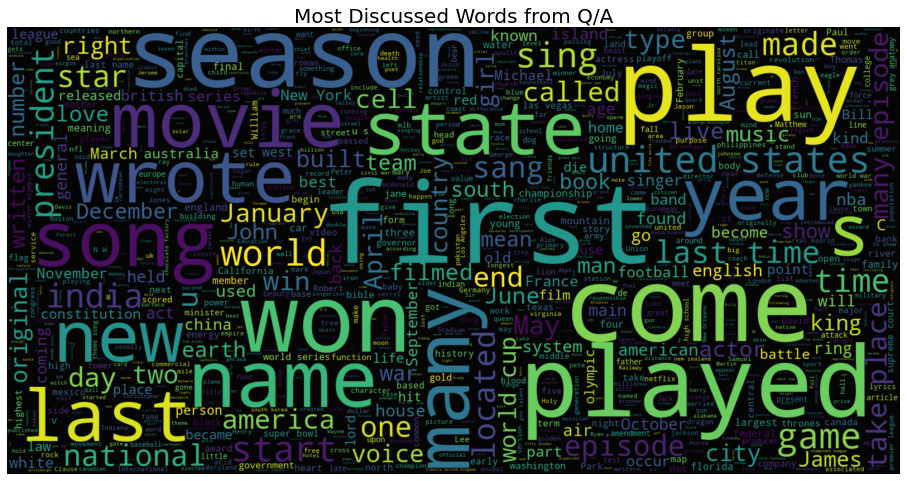

In [112]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(words))
plt.title("Most Discussed Words from Q/A", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

In [107]:
# text, pos, tag, dep, is_alpha, is_stop
pd_df = pd.DataFrame({'text': text,
                      'pos': pos,
                      'tag': tag,
                      'dep': dep,
                      'is_alpha': is_alpha,
                      'is_stop': is_stop})

In [109]:
pd_df.head(20)

,text,pos,tag,dep,is_alpha,is_stop
0,who,PRON,WP,nsubj,True,True
1,presided,VERB,VBD,ROOT,True,False
2,over,ADP,IN,prep,True,True
3,the,DET,DT,det,True,True
4,first,ADJ,JJ,amod,True,True
5,session,NOUN,NN,pobj,True,False
6,of,ADP,IN,prep,True,True
7,muslim,PROPN,NNP,compound,True,False
8,league,PROPN,NNP,pobj,True,False
9,at,ADP,IN,prep,True,True


<AxesSubplot:>

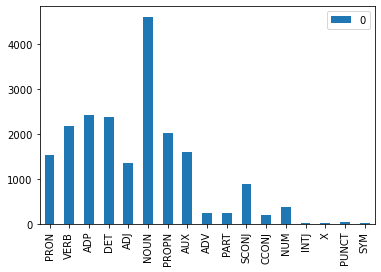

In [125]:
import seaborn as sns
from collections import Counter

pos_counts = Counter(pd_df['pos'])
pos_df = pd.DataFrame.from_dict(pos_counts, orient='index')
pos_df.plot(kind='bar')